In [ ]:
from IPython import get_ipython
from IPython.display import display
from skimage.transform import ProjectiveTransform
from skimage.io import imread
import numpy as np
import matplotlib.pylab as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


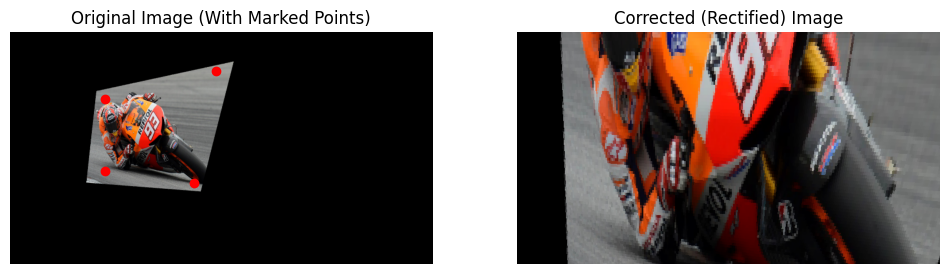

In [ ]:
im_src = (imread('/content/drive/MyDrive/images/markes.png'))
# Dapatkan ukuran gambar
height, width, dim = im_src.shape

# Buat canvas kosong untuk hasil transformasi
im_dst = np.zeros((height, width, dim), dtype=np.uint8)

# Tentukan titik sumber (src) dari gambar miring
src = np.array([[170., 120.],
                [370., 70.],
                [330., 270.],
                [170., 250.]])

# Tentukan titik tujuan (dst) agar gambar menjadi normal
dst = np.array([[0., 0.],
                [width-1, 0.],
                [width-1, height-1],
                [0., height-1]])

# Inisialisasi transformasi proyektif
pt = ProjectiveTransform()
pt.estimate(src, dst)

# Buat koordinat grid untuk gambar tujuan
x, y = np.mgrid[:height, :width]
dst_indices = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))

# Transformasikan koordinat tujuan ke koordinat sumber
src_indices = np.round(pt.inverse(dst_indices), 0).astype(int)

# Pastikan hanya titik yang valid yang digunakan
valid_idx = np.where(
    (src_indices[:, 0] < height) & (src_indices[:, 1] < width) &
    (src_indices[:, 0] >= 0) & (src_indices[:, 1] >= 0)
)

dst_indices_valid = dst_indices[valid_idx]
src_indices_valid = src_indices[valid_idx]

# Isi gambar tujuan dengan piksel dari gambar sumber
im_dst[dst_indices_valid[:, 0], dst_indices_valid[:, 1]] = im_src[src_indices_valid[:, 0], src_indices_valid[:, 1]]

# Tampilkan hasil transformasi
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im_src)
ax[0].scatter(src[:, 0], src[:, 1], color='red', marker='o')  # Tandai titik sumber
ax[0].set_title("Original Image (With Marked Points)")
ax[0].axis("off")

ax[1].imshow(im_dst)
ax[1].set_title("Corrected (Rectified) Image")
ax[1].axis("off")

plt.show()
